This notebook is a continuation of 'capstoneEDA.ipynb'

It imports the cleaned data and creates the regressor models that predict the 
lifetime adjusted gross for each movie. Each model is scored using a number of 
metrics. The best performing model, according to mean absolute percent error, 
was the created using GradientBoostingRegressor(), with a score of 30%. 
This means the model is able to predict the lifetime adjusted gross of a movie, 
on average, with an error of +/- 30%. 

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from xgboost import XGBClassifier
import itertools


In [2]:
def mean_absolute_percentage_error(y_true, y_pred):
    """This function calculatues the mean absolute percent error of the model"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Importing the clean dataframe from 'capstoneEDA.ipynb'

In [3]:
final_df = pd.read_csv('capstone_df')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_name                 1000 non-null   object 
 1   movie_name_no_year         1000 non-null   object 
 2   adj_lifetime_gross         1000 non-null   float64
 3   lifetime_gross             1000 non-null   float64
 4   est_num_tickets            1000 non-null   float64
 5   mpaa_rating                1000 non-null   object 
 6   running_time               1000 non-null   object 
 7   earliest_dom_release_date  1000 non-null   object 
 8   production_companies       1000 non-null   object 
 9   movie_genre                1000 non-null   object 
 10  cast                       1000 non-null   object 
 11  director                   1000 non-null   object 
 12  writer                     1000 non-null   object 
 13  producer                   1000 non-null   object

In [4]:
y = final_df['adj_lifetime_gross']
X = final_df.drop(['adj_lifetime_gross', 'lifetime_gross', 'est_num_tickets', \
                   'movie_name', 'movie_name_no_year', 'mpaa_rating', \
                   'running_time', 'float_run_time', 'franchise', 'movie_genre', \
                   'earliest_dom_release_date', 'production_companies', 'cast', \
                   'director', 'writer', 'producer', 'composer', 'cinematographer', \
                   'prod_designer', 'editor'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)


In [5]:
def model_function(model_name, grid_name):
    """This function will take in the model and hyperparameter 
    grid search name, and will run and score the model"""

    grid = GridSearchCV(estimator = model_name,
                             param_grid = grid_name,
                             cv = None,
                             n_jobs = -1)

    grid.fit(X_train, y_train)

    print(grid.best_params_)


    training_preds = grid.predict(X_train)
    test_preds = grid.predict(X_test)


    print('\n\nTraining Mean Squared Error Score, Random Forest Regressor: ',\
          mean_squared_error(y_train, training_preds))
    print('Test Mean Squared Error Score, Random Forest Regressor: ', \
          mean_squared_error(y_test, test_preds))
    print('Training Explained Variance Score, Random Forest Regressor: ', \
          explained_variance_score(y_train, training_preds))
    print('Test Explained Variance Score, Random Forest Regressor: ', \
          explained_variance_score(y_test, test_preds))
    print('Training R2 Score, Random Forest Regressor: ', \
          r2_score(y_train, training_preds))
    print('Test R2 Score, Random Forest Regressor: ', \
          r2_score(y_test, test_preds))
    print('Training Mean Absolute Error Score, Random Forest Regressor: ', \
          mean_absolute_error(y_train, training_preds))
    print('Test Mean Absolute Error Score, Random Forest Regressor: ', \
          mean_absolute_error(y_test, test_preds))
    print('Training Median Absolute Error Score, Gradient Boosting Regressor: ', \
          median_absolute_error(y_train, training_preds))
    print('Test Median Absolute Error Score, Gradient Boosting Regressor: ', \
          median_absolute_error(y_test, test_preds))
    print('Training Mean Absolute Percent Error, Gradient Boosting Regressor: ', \
          mean_absolute_percentage_error(y_train, training_preds))
    print('Test Mean Absolute Percent Error, Gradient Boosting Regressor: ', \
          mean_absolute_percentage_error(y_test, test_preds))


In [6]:
def feature_importance(model_name, grid_name = None):    
    """This function will take in the model and hyperparameter grid 
    seach name and will plot feature importance for the model"""
    
    model_name.fit(X_train, y_train)
    model_name.feature_importances_
    n_features = X_train.shape[1]
    plt.figure(figsize = (16,18))
    plt.barh(range(n_features), model_name.feature_importances_,align = 'center', color = 'orchid')
    plt.yticks(np.arange(n_features), X_train.columns.values, fontsize = 14)
    plt.xlabel('Feature Importance', fontsize = 16)
    plt.grid(zorder=0)
    plt.show()
    

A random forest regressor.

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.


{'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 75, 'random_state': 123}


Training Mean Squared Error Score, Random Forest Regressor:  8323000251049241.0
Test Mean Squared Error Score, Random Forest Regressor:  2.535401719893957e+16
Training Explained Variance Score, Random Forest Regressor:  0.7395121555644745
Test Explained Variance Score, Random Forest Regressor:  0.2446038065017545
Training R2 Score, Random Forest Regressor:  0.7394504605984529
Test R2 Score, Random Forest Regressor:  0.24446104833601834
Training Mean Absolute Error Score, Random Forest Regressor:  54851917.35742647
Test Mean Absolute Error Score, Random Forest Regressor:  97550912.55949911
Training Median Absolute Error Score, Gradient Boosting Regressor:  34705352.341041386
Test Median Absolute Error Score, Gradient Boosting Regressor:  59643631.69759838
Training Mean Absolute Percent Error, Gradient Boosting Regressor:  19.899524159264388
Test Mean Absolute Percent Error, Gradie

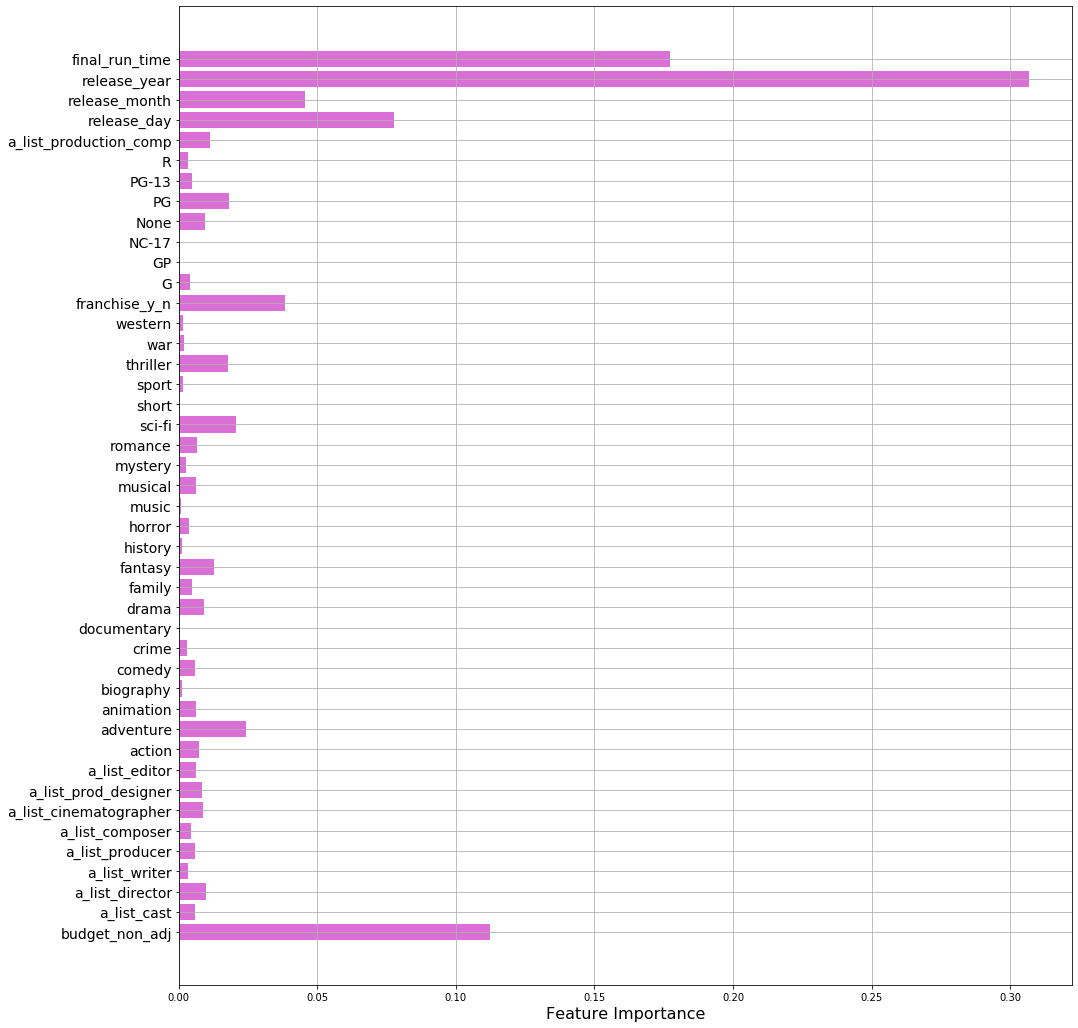

In [7]:
rfr = RandomForestRegressor()

rfr_parameters = {'n_estimators':[45, 60, 75, 90],                   
                  'max_depth': [15, 20, 25, 30],
                  'min_samples_split': [1, 3, 5],
                  'min_samples_leaf': [1, 3, 5],
                  'random_state': [123]
                 }


model_function(rfr, rfr_parameters)
feature_importance(rfr, rfr_parameters)


An extra-trees regressor.

This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Uses random splits and does not use replacement when sampling. In contrast to random forest that uses best splits and does replace when sampling. 

{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 350, 'random_state': 123}


Training Mean Squared Error Score, Random Forest Regressor:  7778886852943841.0
Test Mean Squared Error Score, Random Forest Regressor:  2.517395762201242e+16
Training Explained Variance Score, Random Forest Regressor:  0.756483800858259
Test Explained Variance Score, Random Forest Regressor:  0.24993029681055834
Training R2 Score, Random Forest Regressor:  0.756483800858259
Test R2 Score, Random Forest Regressor:  0.24982674730676313
Training Mean Absolute Error Score, Random Forest Regressor:  55339640.5614292
Test Mean Absolute Error Score, Random Forest Regressor:  97407238.00266685
Training Median Absolute Error Score, Gradient Boosting Regressor:  37151913.70551288
Test Median Absolute Error Score, Gradient Boosting Regressor:  63359261.74675046
Training Mean Absolute Percent Error, Gradient Boosting Regressor:  20.31871753915647
Test Mean Absolute Percent Error, Gradient 

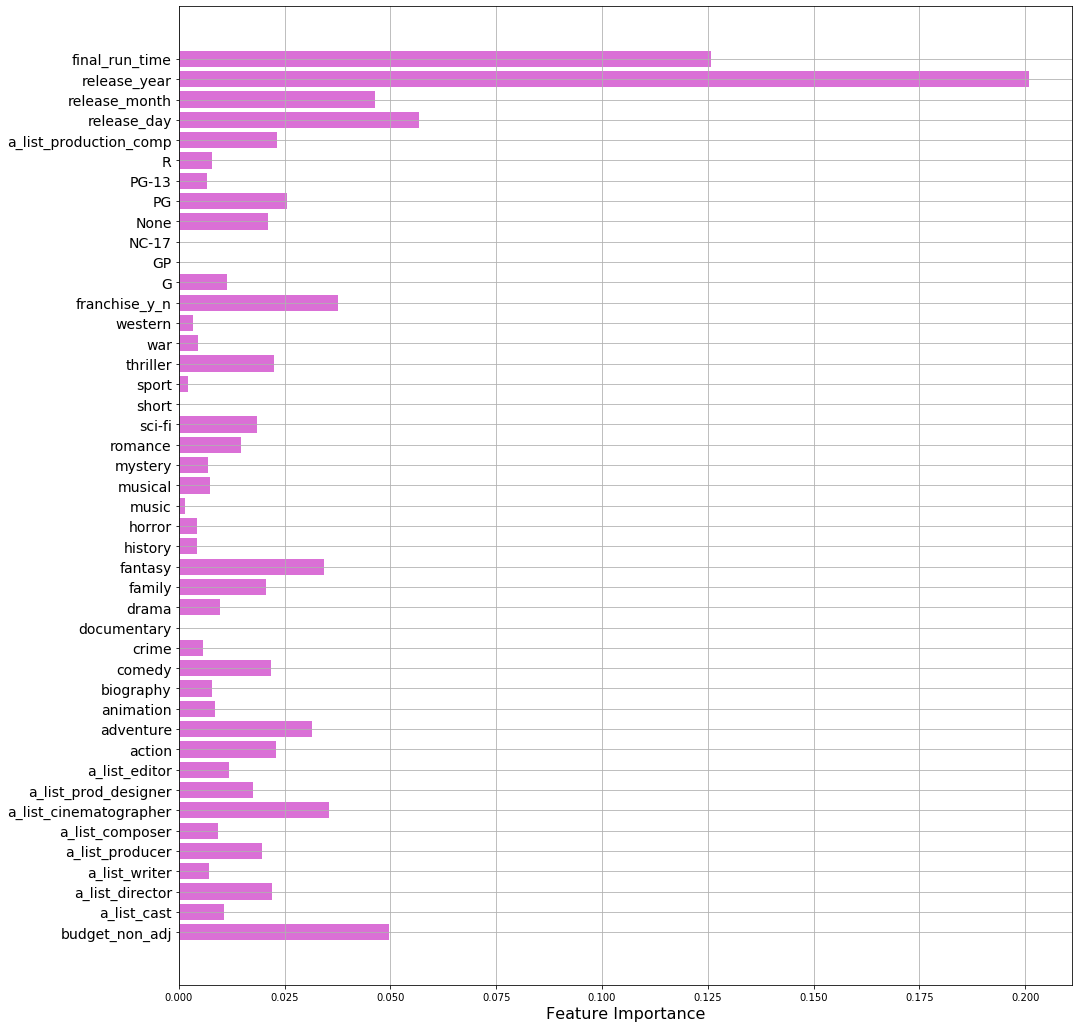

In [8]:
etr = ExtraTreesRegressor()

etr_parameters = {'n_estimators': [250, 300, 350, 400],                   
                  'max_depth': [5, 10, 15, 20],
                  'min_samples_split': [1, 5, 10],
                  'min_samples_leaf': [1, 3, 5],
                  'random_state': [123]
                 }


model_function(etr, etr_parameters)
feature_importance(etr, etr_parameters)


Gradient Boosting for regression.

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 90, 'random_state': 123}


Training Mean Squared Error Score, Random Forest Regressor:  1.0545008409752682e+16
Test Mean Squared Error Score, Random Forest Regressor:  2.481388189755057e+16
Training Explained Variance Score, Random Forest Regressor:  0.669891024717903
Test Explained Variance Score, Random Forest Regressor:  0.2606014919909101
Training R2 Score, Random Forest Regressor:  0.669891024717903
Test R2 Score, Random Forest Regressor:  0.2605568510707905
Training Mean Absolute Error Score, Random Forest Regressor:  71077420.27827933
Test Mean Absolute Error Score, Random Forest Regressor:  97151063.03314944
Training Median Absolute Error Score, Gradient Boosting Regressor:  52705402.199913114
Test Median Absolute Error Score, Gradient Boosting Regressor:  61183852.94940616
Training Mean Absolute Percent Error, Gradient Boosting Regressor:  27.183324097424183
Test Mean Absolute Percent Error, Gradie

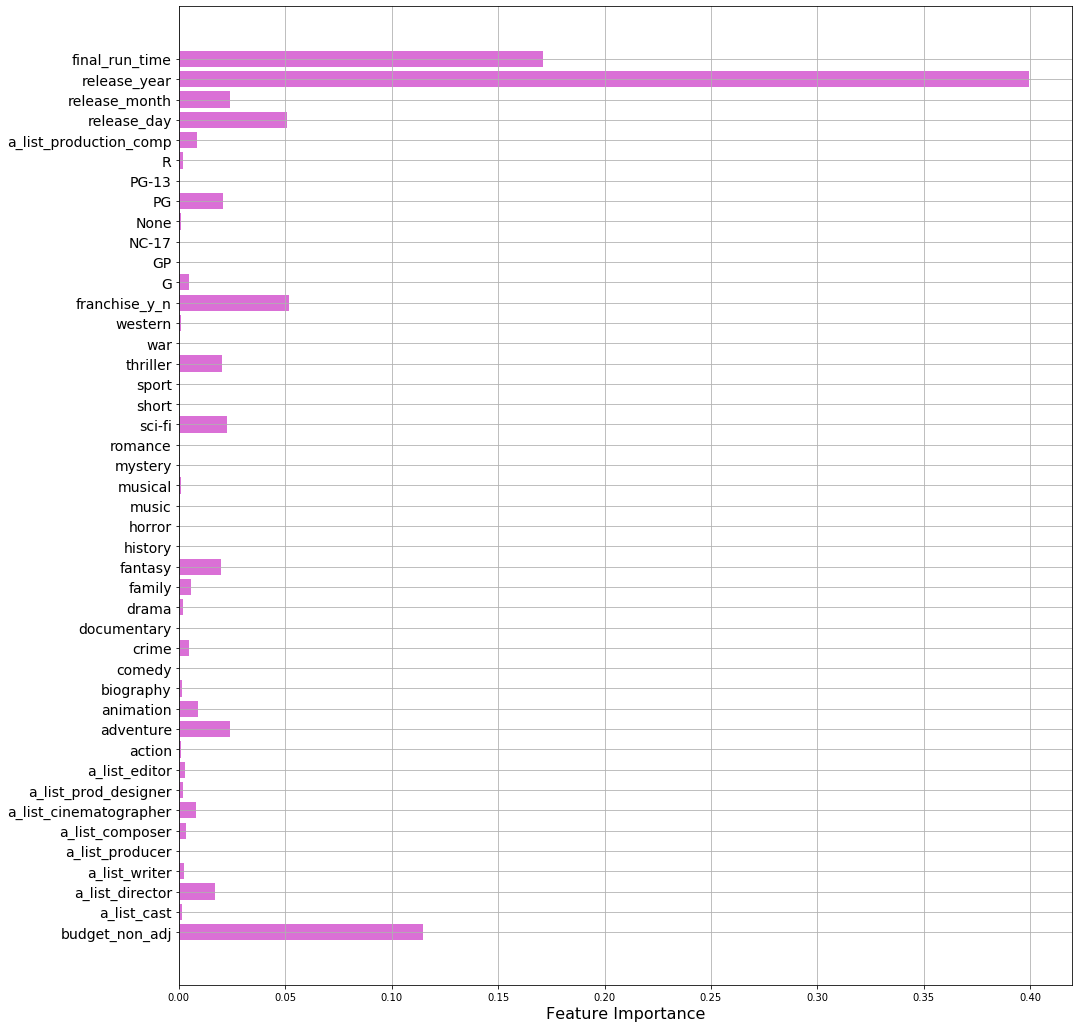

In [9]:
gbr = GradientBoostingRegressor()

gbr_parameters = {'n_estimators':[85, 90, 95],                   
                  'max_depth': [1, 3, 5, 7],
                  'min_samples_split': [1, 3, 5, 7],
                  'min_samples_leaf': [1, 3, 5, 7],
                  'random_state': [123]
                 }

model_function(gbr, gbr_parameters)
feature_importance(gbr, gbr_parameters)


{'learning_rate': 0.025, 'n_estimators': 15, 'random_state': 123}


Training Mean Squared Error Score, Random Forest Regressor:  1.9539663846747124e+16
Test Mean Squared Error Score, Random Forest Regressor:  2.6575613859571276e+16
Training Explained Variance Score, Random Forest Regressor:  0.3886900531201877
Test Explained Variance Score, Random Forest Regressor:  0.2119162147035729
Training R2 Score, Random Forest Regressor:  0.3883154797827598
Test R2 Score, Random Forest Regressor:  0.20805798632466554
Training Mean Absolute Error Score, Random Forest Regressor:  95228283.23965448
Test Mean Absolute Error Score, Random Forest Regressor:  99156885.51654492
Training Median Absolute Error Score, Gradient Boosting Regressor:  70152003.41900407
Test Median Absolute Error Score, Gradient Boosting Regressor:  67821258.86483741
Training Mean Absolute Percent Error, Gradient Boosting Regressor:  35.60635297042173
Test Mean Absolute Percent Error, Gradient Boosting Regressor:  33.5911875264

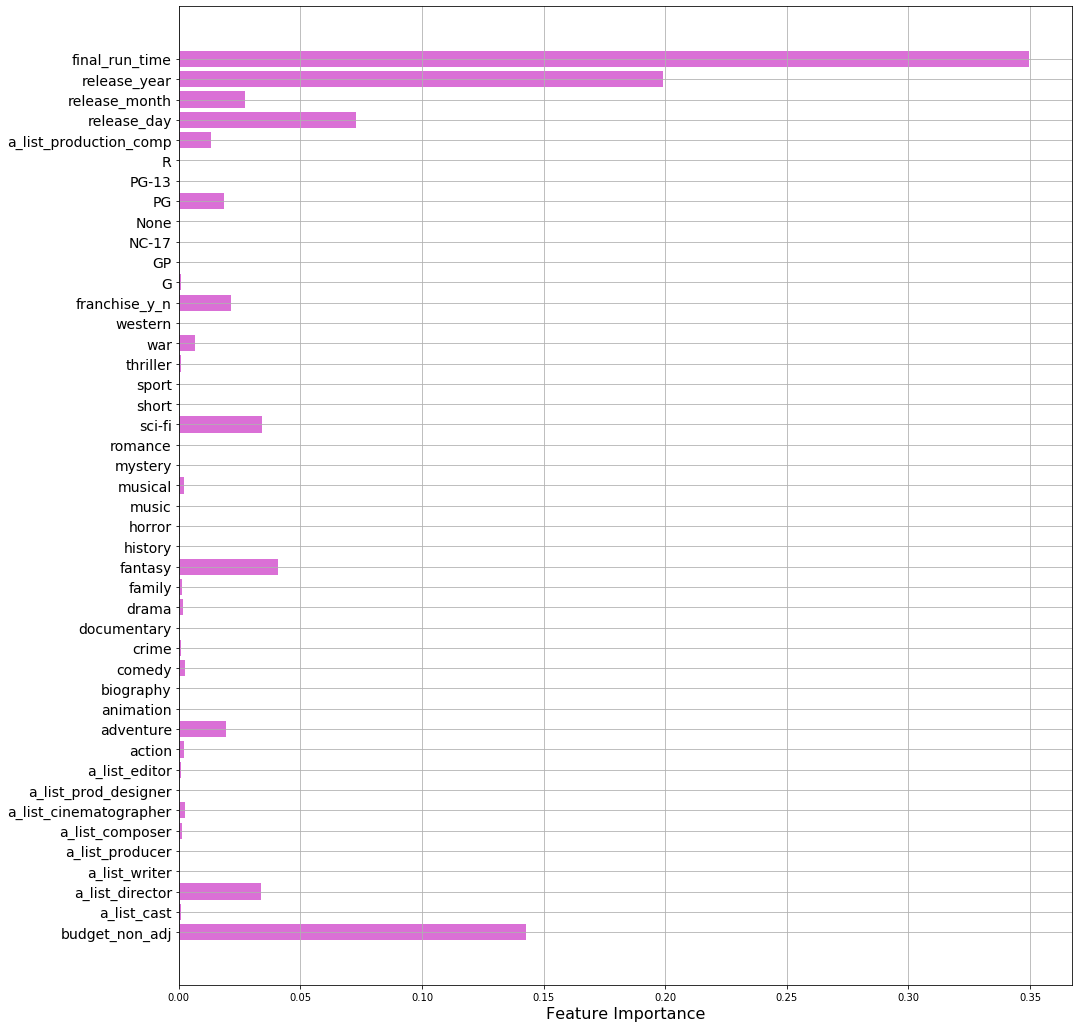

In [10]:
abr = AdaBoostRegressor()

abr_parameters = {'n_estimators':[10, 15, 20],                   
                  'learning_rate': [0.020, 0.025, 0.030],
                  'random_state': [123]
                 }

model_function(abr, abr_parameters)
feature_importance(abr, abr_parameters)


In [11]:
br = BaggingRegressor()

br_parameters = {'n_estimators':[10, 20, 30, 40, 50],
                 'max_samples': [20, 25, 30],
                 'max_features': [10, 20, 30],
                 'random_state': [123]
                 }



model_function(br, br_parameters)


{'max_features': 20, 'max_samples': 25, 'n_estimators': 30, 'random_state': 123}


Training Mean Squared Error Score, Random Forest Regressor:  2.670537593474854e+16
Test Mean Squared Error Score, Random Forest Regressor:  2.834442540169958e+16
Training Explained Variance Score, Random Forest Regressor:  0.16805542602433188
Test Explained Variance Score, Random Forest Regressor:  0.15555816227143993
Training R2 Score, Random Forest Regressor:  0.1639945705316157
Test R2 Score, Random Forest Regressor:  0.15534815309608097
Training Mean Absolute Error Score, Random Forest Regressor:  111137864.15553333
Test Mean Absolute Error Score, Random Forest Regressor:  110097430.0998
Training Median Absolute Error Score, Gradient Boosting Regressor:  86522626.84999998
Test Median Absolute Error Score, Gradient Boosting Regressor:  85172191.21666668
Training Mean Absolute Percent Error, Gradient Boosting Regressor:  43.825264256386895
Test Mean Absolute Percent Error, Gradient Boosting Regressor: 

In [12]:
lr = LinearRegression()
lr_parameters = {}

model_function(lr, lr_parameters)


{}


Training Mean Squared Error Score, Random Forest Regressor:  2.035115754562735e+16
Test Mean Squared Error Score, Random Forest Regressor:  2.275968182261709e+16
Training Explained Variance Score, Random Forest Regressor:  0.3629118629267053
Test Explained Variance Score, Random Forest Regressor:  0.32177249212648495
Training R2 Score, Random Forest Regressor:  0.3629118629267053
Test R2 Score, Random Forest Regressor:  0.32177114145110264
Training Mean Absolute Error Score, Random Forest Regressor:  97491574.71933725
Test Mean Absolute Error Score, Random Forest Regressor:  102142335.74791154
Training Median Absolute Error Score, Gradient Boosting Regressor:  73431921.04045677
Test Median Absolute Error Score, Gradient Boosting Regressor:  77234098.6863594
Training Mean Absolute Percent Error, Gradient Boosting Regressor:  37.664379046602505
Test Mean Absolute Percent Error, Gradient Boosting Regressor:  37.81264762637577


The explained_variance_score computes the explained variance regression score.
The best possible score is 1.0, lower values are worse.

The median_absolute_error is particularly interesting because it is robust to outliers. The loss is calculated by taking the median of all absolute differences between the target and the prediction.

The GradientBoostingRegressor returned the lowest mean absolute percent error. To attempt to improve the model even further, more features are going to be added to the model based on the high feature importance of the existing column, franchise_y_n, which simply indicated whether the movie is part of a franchise or not. The added features will include the top 20 grossing franchises, and the rows will indicate whether that particular movie is part of that particular franchise or not. 

Adding these additional 20 franchise predictors improved the performance of the model by 3%. 


In [13]:
franchise_df = final_df.copy()
grouped_franchise_df = franchise_df.groupby('franchise')['adj_lifetime_gross'].sum().sort_values(ascending = False).to_frame().reset_index().head(21)

top_20_franchise = list(grouped_franchise_df['franchise'])
top_20_franchise.remove('None')

for i in top_20_franchise:
    x = franchise_df['franchise'] == i
    franchise_df.loc[x, i] = 1
    franchise_df.loc[~x, i] = 0

franchise_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 84 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   movie_name                       1000 non-null   object 
 1   movie_name_no_year               1000 non-null   object 
 2   adj_lifetime_gross               1000 non-null   float64
 3   lifetime_gross                   1000 non-null   float64
 4   est_num_tickets                  1000 non-null   float64
 5   mpaa_rating                      1000 non-null   object 
 6   running_time                     1000 non-null   object 
 7   earliest_dom_release_date        1000 non-null   object 
 8   production_companies             1000 non-null   object 
 9   movie_genre                      1000 non-null   object 
 10  cast                             1000 non-null   object 
 11  director                         1000 non-null   object 
 12  writer               

In [14]:
y = franchise_df['adj_lifetime_gross']
X = franchise_df.drop(['adj_lifetime_gross', 'lifetime_gross', 'est_num_tickets',\
                       'movie_name', 'movie_name_no_year', 'mpaa_rating', \
                       'running_time', 'float_run_time', 'franchise', 'movie_genre',\
                       'earliest_dom_release_date', 'production_companies', 'cast', \
                       'director', 'writer', 'producer', 'composer', 'cinematographer',\
                       'prod_designer', 'editor'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)


{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 80, 'random_state': 123}


Training Mean Squared Error Score, Random Forest Regressor:  5499929369776757.0
Test Mean Squared Error Score, Random Forest Regressor:  2.1258663274685804e+16
Training Explained Variance Score, Random Forest Regressor:  0.8278260217695268
Test Explained Variance Score, Random Forest Regressor:  0.36651393494890194
Training R2 Score, Random Forest Regressor:  0.8278260217695268
Test R2 Score, Random Forest Regressor:  0.3665008571105062
Training Mean Absolute Error Score, Random Forest Regressor:  53888590.64799803
Test Mean Absolute Error Score, Random Forest Regressor:  86944013.92413232
Training Median Absolute Error Score, Gradient Boosting Regressor:  41427866.41928373
Test Median Absolute Error Score, Gradient Boosting Regressor:  54869967.623735726
Training Mean Absolute Percent Error, Gradient Boosting Regressor:  21.41847235240775
Test Mean Absolute Percent Error, Gradien

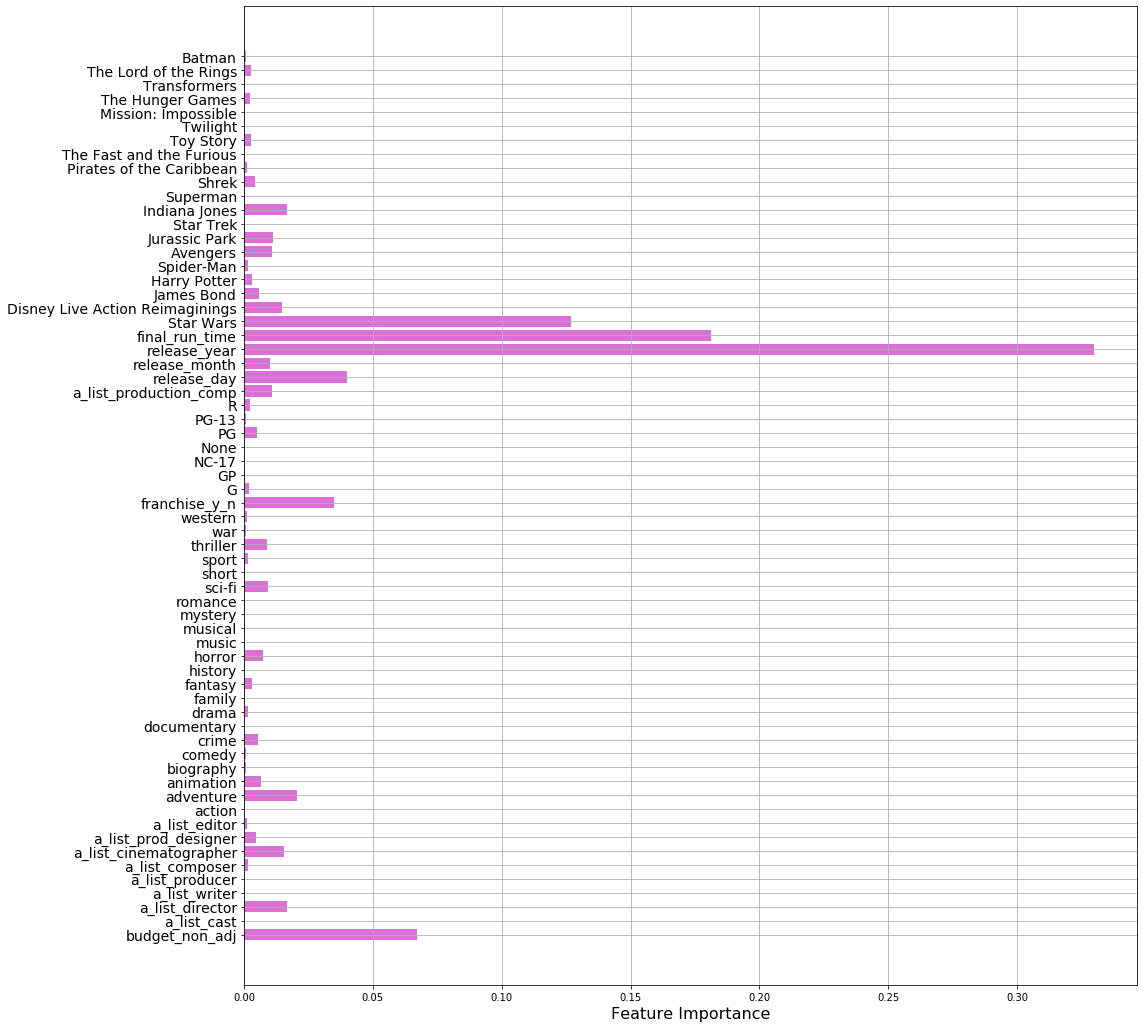

In [15]:
gbr = GradientBoostingRegressor()

gbr_parameters = {'n_estimators':[70, 80, 90],                   
                  'max_depth': [1, 3, 5, 7],
                  'min_samples_split': [3, 5, 7, 9],
                  'min_samples_leaf': [0.5, 1, 1.5],
                  'random_state': [123]
                 }

model_function(gbr, gbr_parameters)
feature_importance(gbr, gbr_parameters)



Live Demo:

Using this model, the lifetime adjusted gross of a chosen movie will be predicted and the absolute percent error calculated. 

Examples to run: 

Harry Potter and the Sorcerer's Stone

Harry Potter and the Chamber of Secrets

Harry Potter and the Prisoner of Azkaban

Harry Potter and the Goblet of Fire

Harry Potter and the Order of the Phoenix

Harry Potter and the Half-Blood Prince

Harry Potter and the Deathly Hallows: Part 1

Harry Potter and the Deathly Hallows: Part 2



In [29]:
y = franchise_df.loc[franchise_df['movie_name_no_year'] == \
                     "Harry Potter and the Sorcerer's Stone", \
                     'adj_lifetime_gross']

x = franchise_df.loc[franchise_df['movie_name_no_year'] == \
                     "Harry Potter and the Sorcerer's Stone"]

X = x.drop(['adj_lifetime_gross', 'lifetime_gross', 'est_num_tickets', \
            'movie_name', 'movie_name_no_year', 'mpaa_rating', 'running_time', \
            'float_run_time', 'franchise', 'movie_genre', 'earliest_dom_release_date', \
            'production_companies', 'cast', 'director', 'writer', 'producer', \
            'composer', 'cinematographer', 'prod_designer', 'editor'], axis = 1)

predict = gbr.predict(X)
print('Actual Gross: $', float(y.values))
print('Prediction Gross: $', round(float(predict), 2))
print('Absolute Percent Error: ', round(mean_absolute_percentage_error(y, predict), 2), '%')


Actual Gross: $ 526061784.0
Prediction Gross: $ 444213414.27
Absolute Percent Error:  15.56 %


Below, the model was attempted to be improved even further by adding more features describing the production company of the movies, similar to that completed above with franchises. This did not improve the model, and resulted instead in overfitting the model. 

In [ ]:
# prod_comp_df = franchise_df.copy()
# grouped_prod_comp_df = prod_comp_df.groupby('production_companies')['adj_lifetime_gross'].sum().sort_values(ascending = False).to_frame().reset_index().head(15)
# grouped_prod_comp_df


In [ ]:
# top_15_prod_comp = list(grouped_prod_comp_df['production_companies'])

# for i in top_15_prod_comp:
#     x = prod_comp_df['production_companies'] == i
#     prod_comp_df.loc[x, i] = 1
#     prod_comp_df.loc[~x, i] = 0
    
# prod_comp_df.info()

In [ ]:
# y = prod_comp_df['adj_lifetime_gross']
# X = prod_comp_df.drop(['adj_lifetime_gross', 'lifetime_gross', 'est_num_tickets', 'movie_name', 'movie_name_no_year', 'mpaa_rating', 'running_time', 'float_run_time', 'franchise', 'movie_genre', 'earliest_dom_release_date', 'production_companies', 'cast', 'director', 'writer', 'producer', 'composer', 'cinematographer', 'prod_designer', 'editor'], axis = 1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)



In [ ]:
# gbr = GradientBoostingRegressor()

# gbr_parameters = {'n_estimators':[70, 75, 80, 85],                   
#                   'max_depth': [1, 3, 5, 7],
#                   'min_samples_split': [3, 5, 7, 9],
#                   'min_samples_leaf': [1, 3, 5, 7],
#                   'random_state': [123]
#                  }

# model_function(gbr, gbr_parameters)
# feature_importance(gbr, gbr_parameters)

